In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 9]

In [22]:
df = pd.read_csv('gurgaon_properties_fe.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3803 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedrooms             3803 non-null   int64  
 8   bathrooms            3803 non-null   int64  
 9   balconies            3803 non-null   object 
 10  floor_num            3784 non-null   float64
 11  facing               2698 non-null   object 
 12  age_possession       3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [23]:
df.duplicated().sum()

126

In [24]:
df.drop_duplicates(inplace=True)
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedrooms,bathrooms,balconies,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,m3m heights,sector 65,2.50,13600.0,1838.0,Super Built up area 1828(169.83 sq.m.),3,3,3,...,1828.0,NaN,NaN,0,0,0,0,0,0,48
1,flat,bestech park view city,sector 48,2.65,10323.0,2567.0,Super Built up area 2567(238.48 sq.m.)Carpet a...,4,4,3+,...,2567.0,NaN,1750.0,1,1,0,0,0,1,174
2,flat,ss the leaf,sector 85,1.20,7317.0,1640.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2,2,3,...,1640.0,1300.0,1000.0,0,0,0,0,0,1,174
3,flat,signature global solera,sector 107,0.52,8062.0,645.0,Carpet area: 645 (59.92 sq.m.),3,2,2,...,NaN,NaN,645.0,0,0,0,0,1,0,15
4,flat,signature global park,sohna road,0.54,7248.0,745.0,Carpet area: 745 (69.21 sq.m.),2,1,3,...,NaN,NaN,745.0,0,0,0,0,0,0,65


In [25]:
df.shape

(3677, 23)

### 1. Property type

<AxesSubplot:>

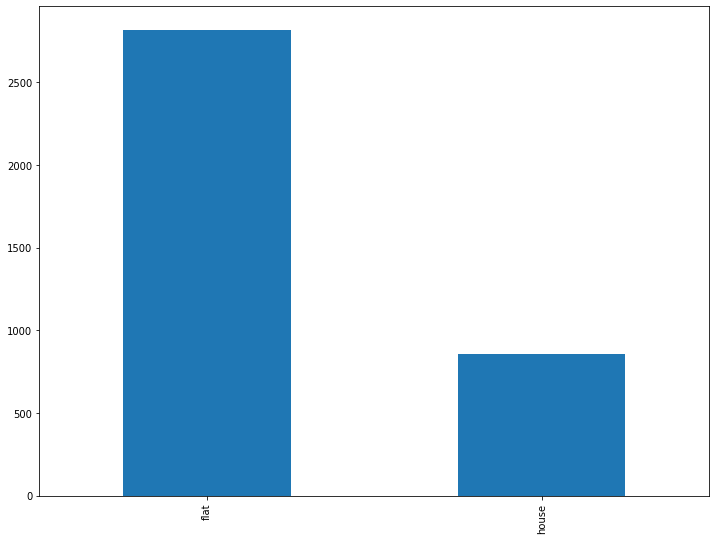

In [65]:
df['property_type'].value_counts().plot(kind='bar')

- Flats are in majority (~75%)
- No missing values

In [27]:
df['society'].value_counts().shape

(675,)

In [29]:
df['society'].value_counts()[:20]

independent                             487
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
signature global park                    35
shree vardhman victoria                  34
smart world orchard                      32
emaar mgf emerald floors premier         32
paras dews                               31
dlf the ultima                           31
m3m woodshire                            30
dlf regal gardens                        30
shree vardhman flora                     29
smart world gems                         28
la vida by tata housing                  28
godrej nature plus                       27
signature global solera                  27
bptp terra                               25
vatika gurgaon                           24
Name: society, dtype: int64

In [38]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(74)

tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
dlf the primus                          0.486520
indiabulls enigma                       0.490596
ramsons kshitij                         0.494671
the close north                         0.498746
ireo the corridors                      0.502508
Name: society, Length: 74, dtype: float64

In [44]:
society_counts = df['society'].value_counts()

frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts >= 2) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 307}

<AxesSubplot:>

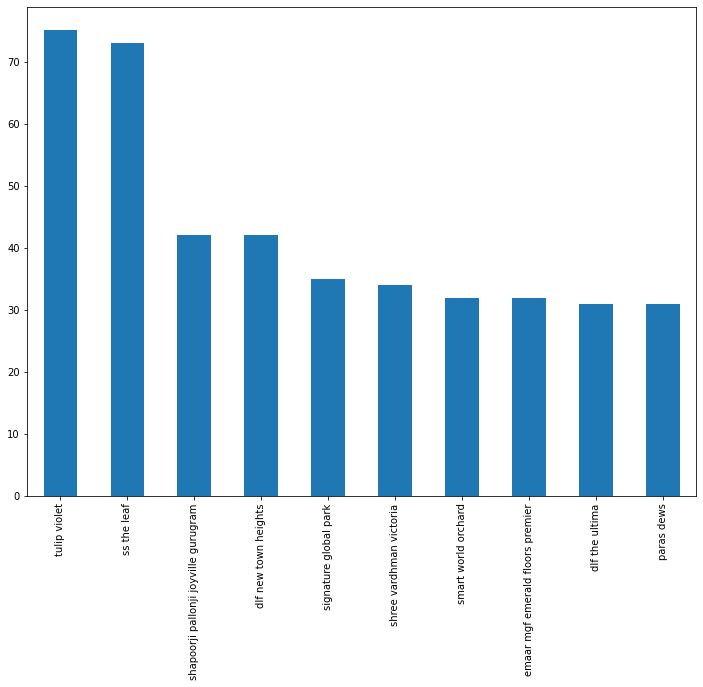

In [66]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [37]:
df['society'].isnull().sum()

0

- Around 13% of the properties are independent
- There are a total of 674 societies in the dataset
- The top 74 societies have 50% of all properties and the rest 600 have the remaining 50% properties.
    - Very High (>100): 1 society has more than 100 properties
    - High (50-100): 2 societies have between 50 t0 100 properties
    - Average (10-49): 92 societies have between 10 to 49 properties
    - Low (2-9): 273 societies have between 2 to 9 properties
    - Very Low (1): This is largest group; 307 societies have 1 property each


### 3. Sector

In [41]:
df['sector'].value_counts()

sohna road    166
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 73       3
sector 17b      3
sector 88b      3
sector 27       3
sector 37       1
Name: sector, Length: 112, dtype: int64

In [42]:
df['sector'].isnull().sum()

0

In [47]:
sector_counts = df['sector'].value_counts()

frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts >= 2) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 62,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

<AxesSubplot:>

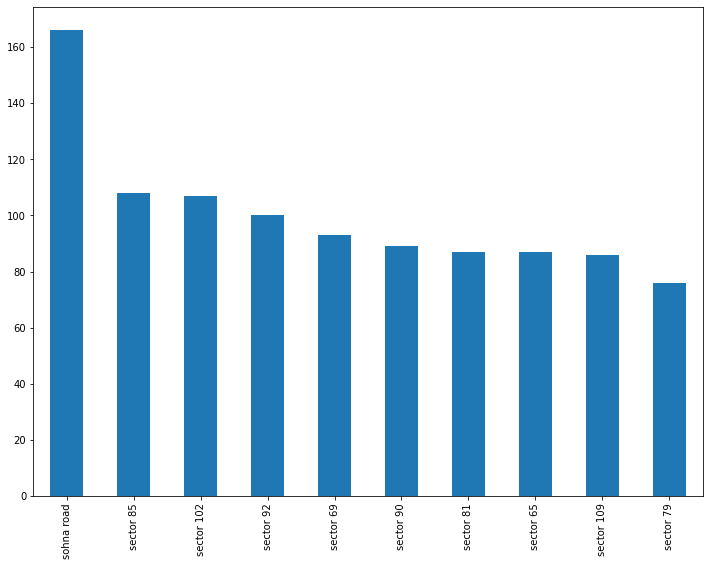

In [67]:
df['sector'].value_counts().head(10).plot(kind='bar')

- There are a total of 112 sectors in the dataset
- Frequency distribution:
    - Very High (>100): 3 sectors have more than 100 properties
    - High (50-100): 25 sectors have between 50 to 100 properties
    - Average (10-49): 62 sectors have between 10 to 49 properties
    - Low (2-9): 21 sectors have between 2 to 9 properties
    - Very Low (1): 1 sector has 1 property

### 4. Price

In [56]:
df['price'].isnull().sum()

17

In [57]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

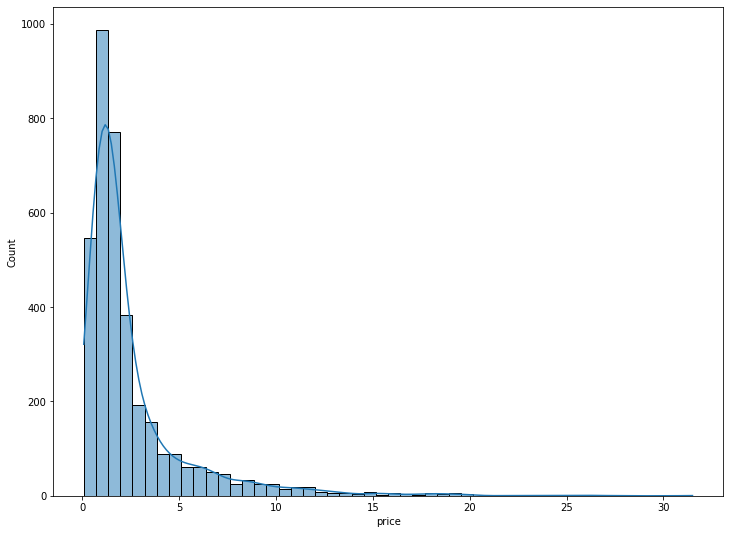

In [62]:
sns.histplot(df['price'], kde=True, bins=50)

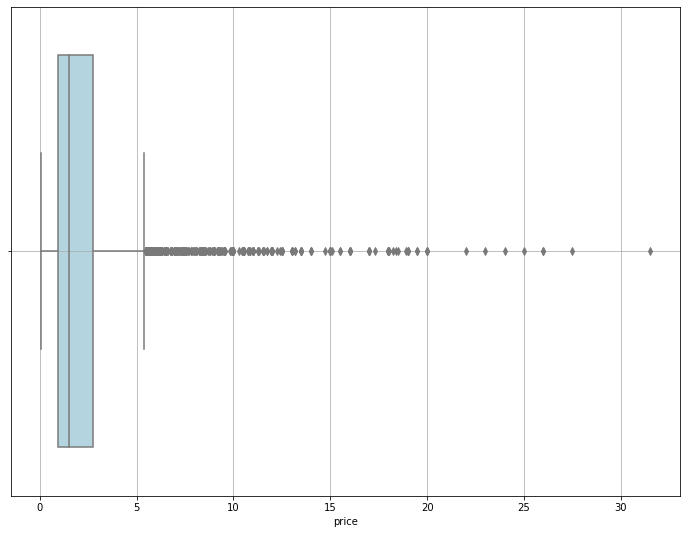

In [73]:
sns.boxplot(x=df['price'], color='lightblue')
plt.grid()

- Descriptive Statistics:
    - The mean price of properties is ~2.5 Cr.
    - The variability in prices is quite high at standard deviation ~ 3 Cr
    - The cheapest property is priced at 7 lacs
    - 25 % of properties are priced under 0.95 Cr
    - 75 % of properties are priced under 2.75 Cr
    - Interquartile Range (IQR): 0.95 Cr to 2.75 Cr (1.80 Cr)
    - Median price is 1.52 Cr which is a better estimate of the central value as the mean value is sensitive to outliers.
- Visualizations:
    - The histogram shows that most properties are priced below 5 crores, while a few properties priced above 10 crores.
    - The boxplot showcases the spread of the data and potential outliers. The properties priced above 10 crores might be considered to be outliers as they lie beyond the upper whisker of the plot.

In [75]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness, kurtosis)

3.2791704733134623 14.933372629214254


**Skewness**: The skewness value is around 3.28, indicating a positive skew (right tail) in the price data. <br>
**Kurtosis**: The kurtosis value is around 15, indicating a heavier tail and the presence of more outliers than a normal distribution.

In [77]:
# Quantile analysis:
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

- Quantile Analysis:
    - 1% Quantile: Only 1% of properties are priced below 0.25 crores.
    - 5% Quantile: 5% of properties are priced below 0.37 crores.
    - 95% Quantile: 95% of properties are priced below 8.5 crores.
    - 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

#### Outlier detection

In [86]:
Q1 = df['price'].describe()['25%']
Q2 = df['price'].describe()['75%']
IQR = Q2 - Q1

IQR

1.8

Q2

In [87]:
lower_bound = Q1 - 1.5*IQR
upper_bound = Q2 + (1.5*IQR)
print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [88]:
outliers = df[(df['price'] > upper_bound) | (df['price'] < lower_bound)]
outliers.shape

(425, 23)

In [90]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

- Outliers Analysis (using IQR method):
    - Based on the IQR method, there are 425 properties considered as outliers.
    - These outliers have an average price of approximately 9.24 crores.
    - The range for these outliers is from 5.46 crores to 31.5 crores.

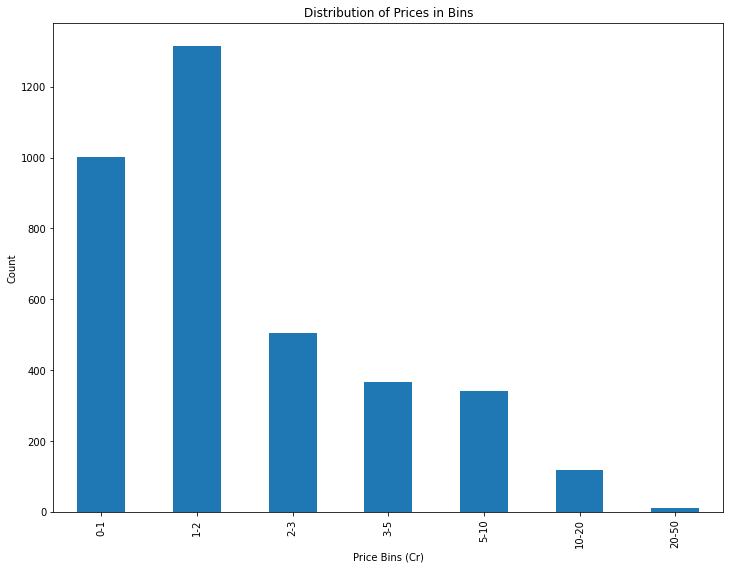

In [97]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Prices in Bins')
plt.xlabel('Price Bins (Cr)')
plt.ylabel('Count')
plt.show()

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above 10 crores.

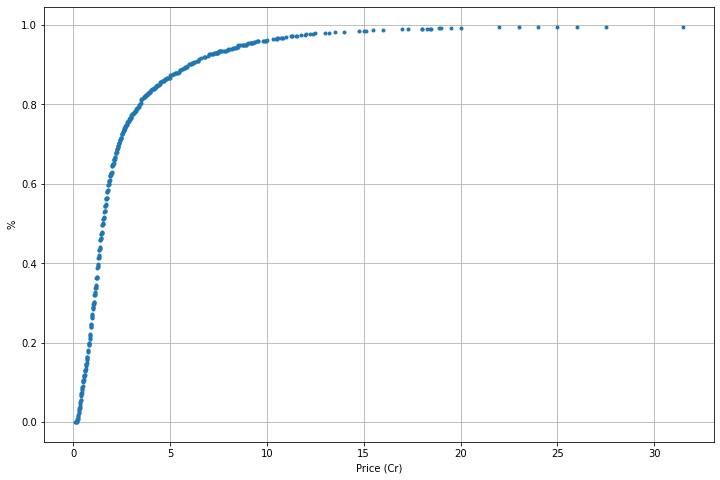

In [104]:
# ecdf plot
plt.figure(figsize=(12,8))
ecdf = df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()
plt.xlabel('Price (Cr)')
plt.ylabel('%')
plt.show()

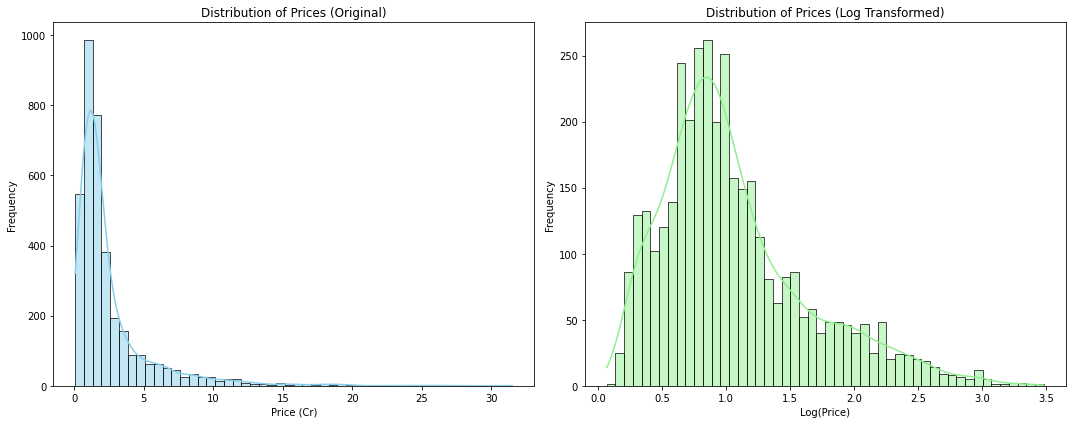

In [105]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (Cr)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

- np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

- Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [106]:
skewness_log = np.log1p(df['price']).skew()
kurtosis_log = np.log1p(df['price']).kurt()
print(skewness_log, kurtosis_log)

1.0740709565255313 0.9646692415449274


- Significantly lower than the original price column

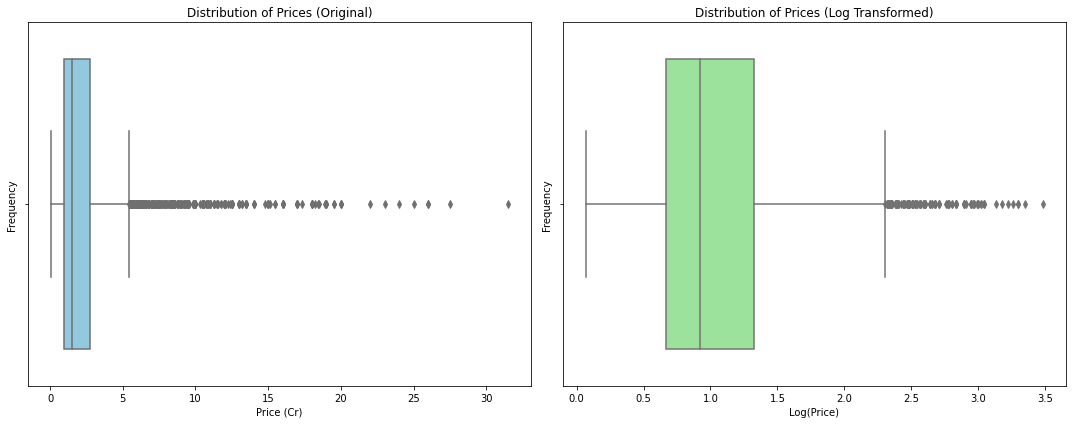

In [112]:
plt.figure(figsize=(15, 6))

# boxplot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (Cr)')
plt.ylabel('Frequency')

# boxplot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()